In [ ]:
%reset -f
import os, sys, imp, glob
sys.path.append('/home/seyedkazemi/codes/mskhelper/')
sys.path.append('/home/seyedkazemi/codes/Marconi100/DNN/')
import pandas as pd, numpy as np
import datetime, pytz
import data_provider, mohsenutils, m100_preprocessing_helper, flag_helper, autoencoder_helper, function_set
import imp 
import datetime
from sklearn.metrics import f1_score
from  matplotlib import pyplot as plt
import seaborn as sns
imp.reload(data_provider)
imp.reload(mohsenutils)
imp.reload(m100_preprocessing_helper)
imp.reload(flag_helper)
imp.reload(autoencoder_helper)
imp.reload(function_set)

def classifier_flag(row, *grey_data_range_train_threshold):
#     print(row)
    if row['sum_flags']>grey_data_range_train_threshold[1]:
        clss = 1
    elif row['sum_flags']<grey_data_range_train_threshold[0]:
        clss = 0
    else:
        clss = 0.5
    return clss

def classifier_error(row, train_error_threshold):
    if row['Error']>train_error_threshold:
        clss = 1
    else:
        clss = 0 
    return clss        



kwargs = {'parse_dates':True, 'date_parser':pd.to_datetime, 'index_col':'timestamp'}



p1 = {'model_dir_path':'/home/seyedkazemi/dataset/Marconi100-Cooked/AE/LSTM-AE-5-Month/LSTM-AE_Results_SqL2-ftur242grey_data_range_01_25-f10/Train_2021-06-15_to_2021-07-15/', 
      'label':'Trained 2021-06-15 to 2021-07-15',
      'start_train':'2021-06-15 00:00:00',
      'stop_train' :'2021-07-15 00:00:00',
      'color':'green',
      'experiment':'Experiment 1'}


p2 = {'model_dir_path' : '/home/seyedkazemi/dataset/Marconi100-Cooked/AE/LSTM-AE-5-Month/LSTM-AE_Results_SqL2-ftur242grey_data_range_01_25-f10/Train_2021-04-08_to_2021-07-01/', 
      'label' : 'Trained 2021-04-08 to 2021-07-01',
      'start_train':'2021-04-08 00:00:00',
      'stop_train' :'2021-07-01 00:00:00',
      'color':'brown',
      'experiment':'Experiment 2'}

p3 = {'model_dir_path' : '/home/seyedkazemi/dataset/Marconi100-Cooked/AE/LSTM-AE-5-Month/LSTM-AE_Results_SqL2-ftur242grey_data_range_01_25-f10/Train_2021-04-08_to_2021-07-15/', 
      'label' : 'Trained 2021-04-08 to 2021-07-15',
      'start_train':'2021-04-08 00:00:00',
      'stop_train' :'2021-07-15 00:00:00',
      'color':'yellow', 
      'experiment':'Experiment 3'}

p4 = {'model_dir_path' : '/home/seyedkazemi/dataset/Marconi100-Cooked/AE/LSTM-AE-5-Month/LSTM-AE_Results_SqL2-ftur242grey_data_range_01_25-f10/Train_2021-04-08_to_2021-05-22/', 
      'label' : 'Trained 2021-04-08 to 2021-05-22',
      'start_train':'2021-04-08 00:00:00',
      'stop_train' :'2021-05-22 00:00:00',
      'color':'cyan',
      'experiment':'Experiment 4'}


p5 = {'model_dir_path' : '/home/seyedkazemi/dataset/Marconi100-Cooked/AE/LSTM-AE-5-Month/LSTM-AE_Results_SqL2-ftur242grey_data_range_01_25-f10/Train_2021-04-08_to_2021-07-22/', 
      'label' : 'Trained 2021-04-08 to 2021-07-22',
      'start_train':'2021-04-08 00:00:00',
      'stop_train' :'2021-07-22 00:00:00',
      'color':'darkorange',
      'experiment':'Experiment 5'}


p6 = {'model_dir_path' : '/home/seyedkazemi/dataset/Marconi100-Cooked/AE/LSTM-AE-5-Month/LSTM-AE_Results_SqL2-ftur242grey_data_range_01_25-f10/Train_2021-06-22_to_2021-07-22/', 
      'label' : 'Trained 2021-06-22 to 2021-07-22',
      'start_train':'2021-06-22 00:00:00',
      'stop_train' :'2021-07-22 00:00:00',
      'color':'blue',
      'experiment':'Experiment 6'}


p7 = {'model_dir_path' : '/home/seyedkazemi/dataset/Marconi100-Cooked/AE/LSTM-AE-5-Month/LSTM-AE_Results_SqL2-ftur242grey_data_range_01_25-f10/Train_2021-04-08_to_2021-07-27/', 
      'label' : 'Trained 2021-04-08 to 2021-07-27',
      'start_train':'2021-04-08 00:00:00',
      'stop_train' :'2021-07-27 00:00:00',
      'color':'olive',
      'experiment':'Experiment 7'}

p8 = {'model_dir_path':'/home/seyedkazemi/dataset/Marconi100-Cooked/AE/LSTM-AE-4_Train_2021-04-08-23-30_to_2021-08-01-23-50/LSTM-AE_Results_SqL2-ftur242grey_data_range_01_25-f10/', 
      'label':'Trained 2021-04-08 to 2021-08-02', 
      'start_train':'2021-04-08 00:00:00', 
      'stop_train' :'2021-08-02 00:00:00',
      'color':'red',
      'experiment':'Experiment 8'}

p9 = {'model_dir_path' : '/home/seyedkazemi/dataset/Marconi100-Cooked/AE/LSTM-AE-5-Month/LSTM-AE_Results_SqL2-ftur242grey_data_range_01_25-f10/Train_2021-04-08_to_2021-08-18/', 
      'label' : 'Trained 2021-04-08 to 2021-08-18',
      'start_train':'2021-04-08 00:00:00',
      'stop_train' :'2021-08-18 00:00:00',
      'color':'blueviolet', 
      'experiment':'Experiment 9'}


data_path_lst = [p1, p2, p3, p4, p5, p6, p7, p8] #, p9
# data_path_lst = [p2, p4, p5, p7, p6, p3, p8, p1] #, p9

dataframe_lst = [pd.read_csv(dt_pth['model_dir_path']+'/Error_Location/Inference_Inference_to_2021_08_17_23_50.csv', **kwargs) for dt_pth in data_path_lst]


grey_data_range_train_threshold=[1, 25, 10]




for i in range(len(data_path_lst)):
    autoencoder_helper.add_label(df=dataframe_lst[i], grey_data_range_train_threshold=grey_data_range_train_threshold, verbose=False, start_train=data_path_lst[i]['start_train'], stop_train=data_path_lst[i]['stop_train'])
    dataframe_lst[i]['class_flags'] = dataframe_lst[i][['sum_flags']].apply(classifier_flag, args=grey_data_range_train_threshold, axis=1) 

print(dataframe_lst[0].shape)
indx = dataframe_lst[0].index
print(len(indx))


#####################
#  Error Threshold  #
#####################
idx = 0
results_ = pd.DataFrame(columns=['start_train', 'stop_train', 'stop_test','quantile','data_zone','%AE_Positive','grey_data_range_train_threshold','TN', 'FP', 'FN', 'TP', 'sum_dt','Accuracy','precision','recall','f1_score','MCC'])

for qntl in np.arange(0.50, 1.01, 0.01):

    qntl = np.round(qntl, 2)
    print(qntl)
    lbe1 = "Train_Month_train"
    lbe2 = "Train_Month_grey_train"
    lbe3 = "Train_Month_grey" 

    # lbe = lbe1
    # error_threshold_lst = [dataframe_lst[i].query('Label==@lbe1')[['Error']].quantile(qntl) for i in range(len(data_path_lst))]


    # lbe = lbe1+'_and_'+lbe2
    # error_threshold_lst = [dataframe_lst[i].query('Label==@lbe1 or Label==@lbe2')[['Error']].quantile(qntl) for i in range(len(data_path_lst))]

    lbe = lbe3
    error_threshold_lst = [dataframe_lst[i].query('Label==@lbe3')[['Error']].quantile(qntl) for i in range(len(data_path_lst))]


#     lbe = lbe2+'_and_'+lbe3
#     error_threshold_lst = [dataframe_lst[i].query('Label==@lbe2 or Label==@lbe3')[['Error']].quantile(qntl) for i in range(len(data_path_lst))]



    for i in range(len(data_path_lst)):    
        dataframe_lst[i]['class_error'] = dataframe_lst[i][['Error']].apply(classifier_error, args=error_threshold_lst[i].values, axis=1) 


    ##########################
    #  Drop the Missed Data  #
    ##########################
    # index_list_null_removed = pd.read_csv('index_list_null_removed.csv', index_col='index_list_null_removed', parse_dates=True, date_parser=pd.to_datetime).index
    # null_index = pd.read_csv('null_index.csv', index_col='null_index', parse_dates=True, date_parser=pd.to_datetime).index

    # for i in range(len(data_path_lst)):
    #     dataframe_lst[i].drop(index=null_index, inplace=True)
    #     dataframe_lst[i] = mohsenutils.mrg(None, 'outer', *[pd.DataFrame(index=indx), dataframe_lst[i]])
    ##########################
    #  Drop the Missed Data  #
    ##########################






    for i in range(len(data_path_lst)):
        df = dataframe_lst[i].loc[pd.to_datetime(data_path_lst[i]['stop_train']):pd.to_datetime(data_path_lst[i]['stop_train'])+datetime.timedelta(days=7), ['class_flags','class_error']]
        results_.loc[idx, ['%AE_Positive']] = 100*df['class_error'].mean() 
        df = df.replace(to_replace = 0.5, value=np.nan).dropna()
        
        TN, FP, FN, TP = function_set.conf_mat(y=df['class_flags'], y_pred=df['class_error'])
        sum_dt, acc, precision, recall, f1, MCC = function_set.metrics_all_msk(TN=TN, FP=FP, FN=FN, TP=TP)
#         print('TN', TN, 'FP', FP, 'FN', FN, 'TP' ,TP,'sum_dt',sum_dt,'acc',acc,'precision',precision,'recall',recall,'f1',f1,'MCC',MCC)
#         print()

        results_.loc[idx, ['start_train', 'stop_train', 'stop_test']] = [data_path_lst[i]['start_train'], data_path_lst[i]['stop_train'],pd.to_datetime(data_path_lst[i]['stop_train'])+datetime.timedelta(days=7)]
        results_.loc[idx, ['quantile','data_zone','grey_data_range_train_threshold']] = [qntl,lbe,grey_data_range_train_threshold]
        results_.loc[idx, ['TN', 'FP', 'FN', 'TP']] = [TN, FP, FN, TP]
        results_.loc[idx, ['sum_dt','Accuracy','precision','recall','f1_score','MCC']] = [sum_dt, acc, precision, recall, f1, MCC] 

        idx += 1
    
        
results_['Positive'] = results_['TP']+results_['FN']
results_['Negative'] = results_['TN']+results_['FP']
results_['%Positive'] = 100*results_['Positive']/1009
results_['%Negative'] = 100*results_['Negative']/1009


# results_.to_csv('results_3.csv')

display(results_)
print('Done!')


,start_train,stop_train,stop_test,quantile,data_zone,%AE_Positive,grey_data_range_train_threshold,TN,FP,FN,...,sum_dt,Accuracy,precision,recall,f1_score,MCC,Positive,Negative,%Positive,%Negative
0,2021-06-15 00:00:00,2021-07-15 00:00:00,2021-07-22 00:00:00,0.5,Train_Month_train,100.000000,"[1, 25, 10]",0,187,0,...,314.0,40.445860,0.404459,1.000000,0.575964,NaN,127,187,12.586720,18.533201
1,2021-04-08 00:00:00,2021-07-01 00:00:00,2021-07-08 00:00:00,0.5,Train_Month_train,99.801784,"[1, 25, 10]",0,107,0,...,125.0,14.400000,0.144000,1.000000,0.251748,NaN,18,107,1.783944,10.604559
2,2021-04-08 00:00:00,2021-07-15 00:00:00,2021-07-22 00:00:00,0.5,Train_Month_train,100.000000,"[1, 25, 10]",0,187,0,...,314.0,40.445860,0.404459,1.000000,0.575964,NaN,127,187,12.586720,18.533201
3,2021-04-08 00:00:00,2021-05-22 00:00:00,2021-05-29 00:00:00,0.5,Train_Month_train,100.000000,"[1, 25, 10]",0,198,0,...,261.0,24.137931,0.241379,1.000000,0.388889,NaN,63,198,6.243806,19.623389
4,2021-04-08 00:00:00,2021-07-22 00:00:00,2021-07-29 00:00:00,0.5,Train_Month_train,100.000000,"[1, 25, 10]",0,0,0,...,136.0,100.000000,1.000000,1.000000,1.000000,NaN,136,0,13.478692,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,2021-04-08 00:00:00,2021-05-22 00:00:00,2021-05-29 00:00:00,1.0,Train_Month_grey_train_and_Train_Month_grey,1.883053,"[1, 25, 10]",198,0,49,...,261.0,81.226054,1.000000,0.222222,0.363636,0.422064,63,198,6.243806,19.623389
404,2021-04-08 00:00:00,2021-07-22 00:00:00,2021-07-29 00:00:00,1.0,Train_Month_grey_train_and_Train_Month_grey,0.991080,"[1, 25, 10]",0,0,126,...,136.0,7.352941,1.000000,0.073529,0.136986,NaN,136,0,13.478692,0.000000
405,2021-06-22 00:00:00,2021-07-22 00:00:00,2021-07-29 00:00:00,1.0,Train_Month_grey_train_and_Train_Month_grey,8.919722,"[1, 25, 10]",0,0,78,...,136.0,42.647059,1.000000,0.426471,0.597938,NaN,136,0,13.478692,0.000000
406,2021-04-08 00:00:00,2021-07-27 00:00:00,2021-08-03 00:00:00,1.0,Train_Month_grey_train_and_Train_Month_grey,9.217047,"[1, 25, 10]",0,0,66,...,80.0,17.500000,1.000000,0.175000,0.297872,NaN,80,0,7.928642,0.000000


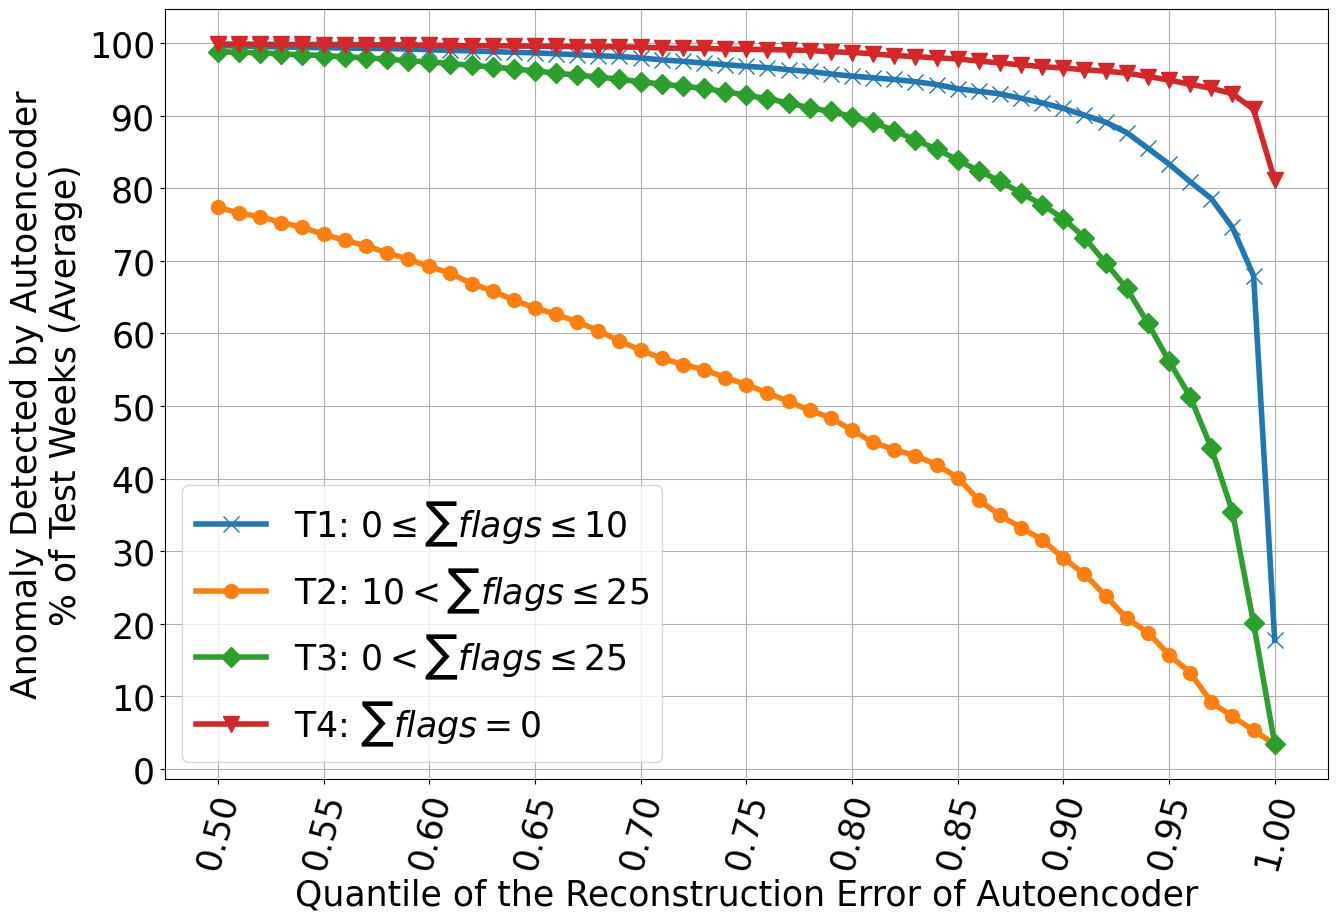

In [4]:
%reset -f
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
df1 = pd.read_csv('/home/seyedkazemi/USEFUL_DATA_CODE/codes/Marconi100/Results_Analysis/csv_files/results_1.csv', index_col='Unnamed: 0')
df2 = pd.read_csv('/home/seyedkazemi/USEFUL_DATA_CODE/codes/Marconi100/Results_Analysis/csv_files/results_2.csv', index_col='Unnamed: 0')
df3 = pd.read_csv('/home/seyedkazemi/USEFUL_DATA_CODE/codes/Marconi100/Results_Analysis/csv_files/results_3.csv', index_col='Unnamed: 0')
df4 = pd.read_csv('/home/seyedkazemi/USEFUL_DATA_CODE/codes/Marconi100/Results_Analysis/csv_files/results_4.csv', index_col='Unnamed: 0')
# pd.set_option('display.max_rows', None)

dt = pd.concat([df1,df2,df3,df4])

display(dt)

# dt = dt.query('stop_train!="2021-08-02 00:00:00"')

dt.replace('Train_Month_grey_train_and_Train_Month_grey','0<Sum{flags}<25', inplace=True)
dt.replace('Train_Month_grey','10<Sum{flags}<25', inplace=True)
dt.replace('Train_Month_train','Sum{flags}=0', inplace=True)
dt.replace('Train_Month_train_and_Train_Month_grey_train','0<=Sum{flags}<=10', inplace=True)


num_cols = dt.select_dtypes(include=['number', 'bool']).columns
res = dt.groupby(['data_zone', 'quantile'])[num_cols].mean()


# res = dt.groupby(['data_zone','quantile']).mean()
# res.sort_values(['MCC','f1_score'], ascending=False)

fig, ax =plt.subplots(1,1,figsize=(15,10))
kwargs = {'lw':4, }
ax.plot(res.loc[('0<=Sum{flags}<=10',slice(None)),['%AE_Positive']].droplevel(level=0), label='T1: $0\leq\sum{flags}\leq10$', marker='x', markersize=12, **kwargs)
ax.plot(res.loc[('10<Sum{flags}<25',slice(None)),['%AE_Positive']].droplevel(level=0),label='T2: $10<\sum{flags}\leq25$',     marker='o', markersize=10, **kwargs)
ax.plot(res.loc[('0<Sum{flags}<25',slice(None)),['%AE_Positive']].droplevel(level=0),label='T3: $0<\sum{flags}\leq25$',       marker="D", markersize=10, **kwargs)
ax.plot(res.loc[('Sum{flags}=0',slice(None)),['%AE_Positive']].droplevel(level=0),label='T4: $\sum{flags}=0$',                marker="v", markersize=12, **kwargs)

ax.grid()
ax.legend(fontsize=25)
ax.set_xticks([np.round(qntl, 2) for qntl in np.arange(0.50, 1.01, 0.05)])
ax.set_yticks([np.round(qntl, 2) for qntl in range(0, 105, 10)])
ax.set_ylabel('Anomaly Detected by Autoencoder\n% of Test Weeks (Average)', fontsize=25)
ax.set_xlabel('Quantile of the Reconstruction Error of Autoencoder', fontsize=25)

ax.tick_params(axis='x', labelsize=25, rotation=75)
ax.tick_params(axis='y', labelsize=25, rotation=0)

# plt.savefig('Av_Anomaly_Percentage.jpg', bbox_inches = 'tight', pad_inches = 0.2, dpi=100)
plt.savefig('Av_Anomaly_Percentage.pdf', bbox_inches = 'tight', pad_inches = 0.2, dpi=100)
plt.show()